In [1]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import mapclassify as mc
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from shapely.geometry import MultiPoint, Point
import numpy as np
from PIL import Image
import cv2

In [96]:
df1 = pd.read_csv('DROSO.csv', encoding='latin-1')
df1['Country'] = pd.Categorical(df1['Country'],["South Africa","Nigeria","Kenya","Morocco","Egypt","Tunisia","Algeria","Tanzania","Benin","Cameroon","Uganda","Mauritius","Zimbabwe","Mozambique"])


df1["First Author's Institution"] = pd.Categorical(df1["First Author's Institution"],["ICIPE Nairobi, Kenya",
"UI, Nigeria",
"FUT Akure, Nigeria",
"SU, South Africa",
"BMU Annaba, Algeria",
"IITA Cotonou, Benin",
"NWU South Africa",
"UP South Africa",
"SUA Tanzania",
"UT El Manar, Tunisia",
"Other Institutions"])
df1['Funded/Not funded'] = df1['Funded/Not funded'].replace({1: 'Funded', 0: 'Not Funded'})
df1['Funded/Not funded']= df1['Funded/Not funded'].apply(str)

In [97]:
df2 = pd.read_csv('T_S_N.csv')
df2['Year']=df2['Year'].apply(str)
df2_2 = pd.read_csv('TS_2.csv')
df2_2['Year']=df2_2['Year'].apply(str)

In [ ]:
axes1 = fig.add_subplot(1, 2, 1)
axes2 = fig.add_subplot(1, 2, 2)

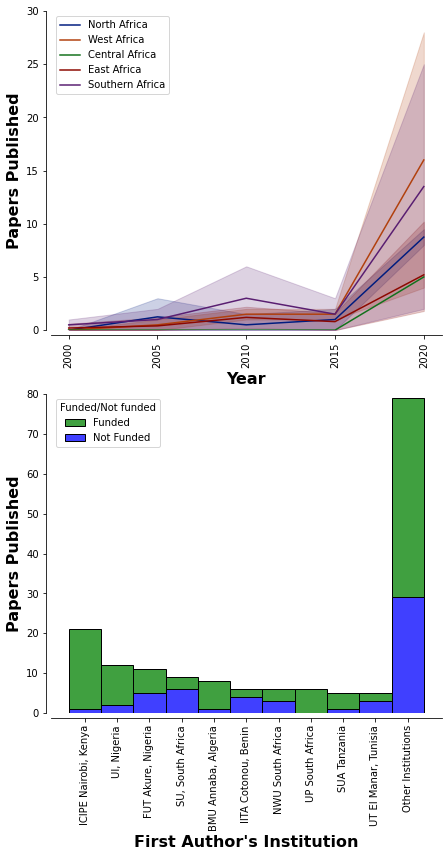

In [98]:
fig, axes = plt.subplots(2, 1,  figsize=(7, 10))
sns.despine(offset=5, trim=False)

ax1 = sns.histplot(ax=axes[1], x="First Author's Institution",
             hue="Funded/Not funded", palette=["g","b"], multiple="stack",
            data=df1,)

ax2 = sns.lineplot(ax=axes[0], x='Year', y='Number', hue='Region',
palette="dark",markers=True,dashes=False, data=df2, legend=True)
plt.sca(axes[0])
plt.ylabel('Papers Published',weight = "bold", fontsize=16 )
plt.xlabel("Year",weight = "bold", fontsize=16 )
plt.xticks(rotation=90)
plt.legend(loc="upper left")
plt.ylim((0, 30))
plt.sca(axes[1])
plt.ylabel('Papers Published',weight = "bold", fontsize=16 )
plt.subplots_adjust(top = 1.1)
plt.xlabel("First Author's Institution",weight = "bold", fontsize=16 )
plt.xticks(rotation=90)
plt.ylim((0, 80))
plt.savefig('Fig.png',  bbox_inches = 'tight', dpi=300)

In [99]:
df1['Country'] = pd.Categorical(df1['Country'],["South Africa","Nigeria","Kenya","Morocco","Egypt","Tunisia","Algeria","Tanzania","Benin","Cameroon","Uganda","Mauritius","Zimbabwe","Mozambique"])
df1["Region"] = pd.Categorical(df1["Region"],["North Africa",
"East Africa",
"Southaern Africa",
"West Africa",
"Central Africa"])
df1['Is it Neuroscience oriented?'] = df1['Is it Neuroscience oriented?'].replace({1: 'Yes', 0: 'No'})
df1['Is it Neuroscience oriented?']= df1['Is it Neuroscience oriented?'].apply(str)

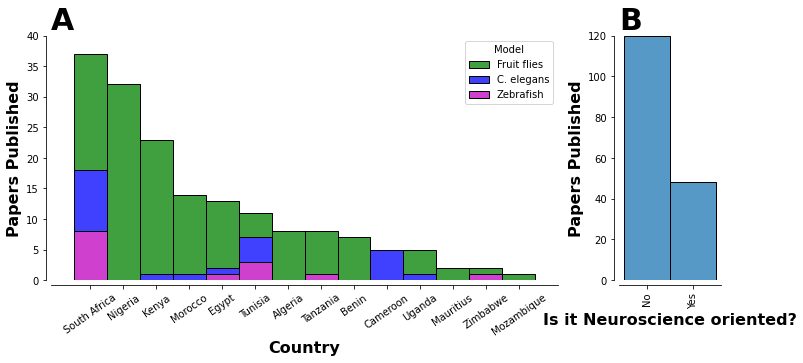

In [100]:
## here i specified that i want to plot two plots the (1,2) in the code means 
fig, axes = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 1]},  figsize=(12, 4.5))
sns.despine(offset=5, trim=False)
## This code is for the stack plot
sns.histplot(ax=axes[0], x="Country",
             hue="Model", palette=["g","b","m"], multiple="stack",
            data=df1)
sns.histplot(ax=axes[1],x="Is it Neuroscience oriented?",
            data=df1)
## here are consmetic parts of the stack plot
plt.sca(axes[0])
plt.title('A', loc = 'left', fontsize = 30, weight="bold")
plt.ylabel('Papers Published',weight = "bold", fontsize=16 )
plt.xlabel("Country",weight = "bold", fontsize=16 )
plt.xticks(rotation=35)
plt.ylim((0, 40))

plt.sca(axes[1])
plt.title('B', loc = 'left', fontsize = 30, weight="bold")
plt.ylabel('Papers Published',weight = "bold", fontsize=16 )
plt.xlabel("Is it Neuroscience oriented?",weight = "bold", fontsize=16 )
plt.xticks(rotation=90)
plt.ylim((0, 120))

plt.savefig('Fig2.png',  bbox_inches = 'tight', dpi=300)

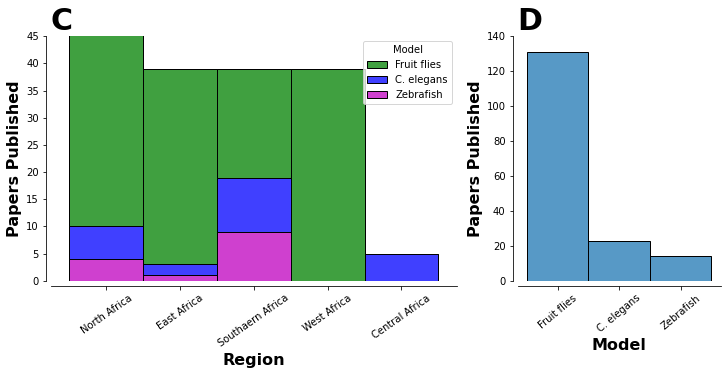

In [101]:
fig, axes = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1]},  figsize=(12, 4.5))
sns.despine(offset=5, trim=False)

ax1 = sns.histplot(ax=axes[0], x="Region",
             hue="Model", palette=["g","b","m"], multiple="stack",
            data=df1,legend=True)
ax2 = sns.histplot(ax=axes[1],x="Model",
            data=df1)
plt.sca(axes[0])
plt.title('C', loc = 'left', fontsize = 30, weight="bold")
plt.ylabel('Papers Published',weight = "bold", fontsize=16 )
plt.xlabel("Region",weight = "bold", fontsize=16 )
plt.xticks(rotation=35)
plt.ylim((0, 45))
plt.sca(axes[1])
plt.title('D', loc = 'left', fontsize = 30, weight="bold")
plt.xlabel("Model",weight = "bold", fontsize=16 )
plt.ylabel('Papers Published',weight = "bold", fontsize=16 )
plt.xticks(rotation=40)
plt.ylim((0, 140))

plt.savefig('Fig2_.png',  bbox_inches = 'tight', dpi=300)

In [106]:
df1['Funding'] = df1['Funding'].replace({0: 'Not Funded', 1: 'Local', 2: 'International', 3: 'Both'})
df1['Funding']=df1['Funding'].apply(str)
df1["Funding"] = pd.Categorical(df1["Funding"],["Not Funded",
"International",
"Local",
"Both",
])

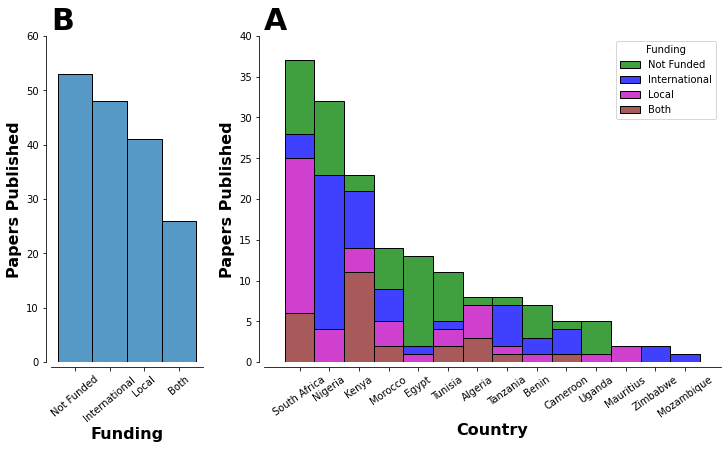

In [108]:
fig, axes = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 3]},  figsize=(12, 6))
sns.despine(offset=5, trim=False)

sns.histplot(ax=axes[1], x="Country",
             hue="Funding", palette=["g","b","m","#8B2323"], multiple="stack",
            data=df1)
sns.histplot(ax=axes[0],x="Funding",
            data=df1)
plt.sca(axes[1])
plt.xlabel("Country",weight = "bold", fontsize=16 )
plt.title('A', loc = 'left', fontsize = 30, weight="bold")
plt.ylabel('Papers Published',weight = "bold", fontsize=16 )
plt.xticks(rotation=35)
plt.ylim((0, 40))
plt.sca(axes[0])
plt.xlabel("Funding",weight = "bold", fontsize=16 )
plt.title('B', loc = 'left', fontsize = 30, weight="bold")
plt.ylabel('Papers Published',weight = "bold", fontsize=16 )
plt.xticks(rotation=40)
plt.ylim((0, 60))

plt.savefig('Fig3.png',  bbox_inches = 'tight', dpi=300)

In [23]:
df3_1 = pd.read_csv('IF_1.csv',encoding='latin-1')
df3_1["Top International Funders"] = pd.Categorical(df3_1["Top International Funders"],["DAAD Germany",
"TWAS Italy",
"DFS Germany",
"IAEA Austria",
"SIDA Sweden",
"AVHF Germany",
"GMECD Germany",
"WT UK",
"DFID UK",
"USDA-ARS USA"
])
df4_1 = pd.read_csv('fund_bar_1.csv', encoding='latin-1')
df4_1["Top Local Funders"] = pd.Categorical(df4_1["Top Local Funders"],["NRF South Africa",
"ICIPE Kenya",
"NFSR Algeria",
"IFAD Kenya",
"KG Kenya",
"MHESR, Algeria",
"TMHESR Tunisia",
])

In [25]:
df9 = pd.read_csv('FND.csv', encoding='latin-1')
df9_1 = df9.pivot("Institution", "Funder", "Number")

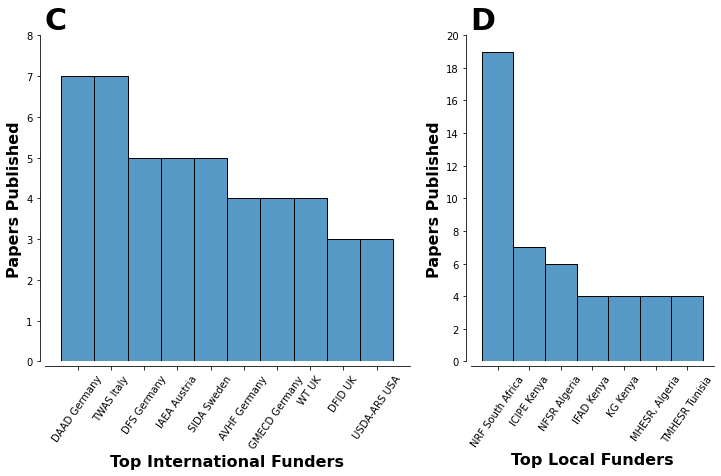

In [109]:
fig, axes = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 2]},  figsize=(12, 6))
sns.despine(offset=5, trim=False)

ax1 = sns.histplot(ax=axes[0], x="Top International Funders",
             data=df3_1,legend=True)
ax2 = sns.histplot(ax=axes[1],x="Top Local Funders",
            data=df4_1)
plt.sca(axes[0])
plt.ylabel('Papers Published',weight = "bold", fontsize=16 )
plt.title('C', loc = 'left', fontsize = 30, weight="bold")
plt.xlabel("Top International Funders",weight = "bold", fontsize=16 )
plt.xticks(rotation=55)
plt.ylim((0, 8))
plt.sca(axes[1])
plt.ylabel('Papers Published',weight = "bold", fontsize=16 )
plt.title('D', loc = 'left', fontsize = 30, weight="bold")
plt.xlabel("Top Local Funders",weight = "bold", fontsize=16 )
plt.xticks(rotation=55)
plt.ylim((0, 20))
plt.yticks(np.arange(0, 22, 2))
plt.savefig('Fig3_.png',  bbox_inches = 'tight', dpi=300)

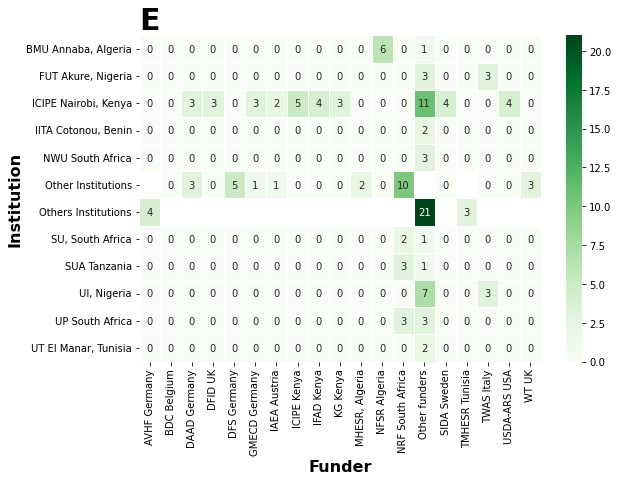

In [131]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df9_1, annot=True, linewidths=.5, cmap='Greens', ax=ax)
fig = plt.gcf()
plt.title('E', loc = 'left', fontsize = 30, weight="bold")
plt.xlabel("Funder",weight = "bold", fontsize=16 )
plt.ylabel("Institution",weight = "bold", fontsize=16 )
plt.savefig('Fig 3E.png', bbox_inches = 'tight', dpi=300)

In [111]:
df1['IEC'] = df1['IEC'].replace({0: 'None', 1: 'External Only', 2: 'Internal Only', 3: 'Both'})
df1['IEC']=df1['IEC'].apply(str)
df1["IEC"] = pd.Categorical(df1["IEC"],["None",
"External Only",
"Internal Only",
"Both",
])
df6 = pd.read_csv('INT_COLAB.csv',encoding='latin-1')
df6["Country of external collaboration"] = pd.Categorical(df6["Country of external collaboration"],["Germany",
"France",
"Belgium",
"UK",
"USA",
"Brazil",
"Australia",
"Czech Republic",
"Italy",
"Japan",
"Spain",
"Turkey",
"Others"])

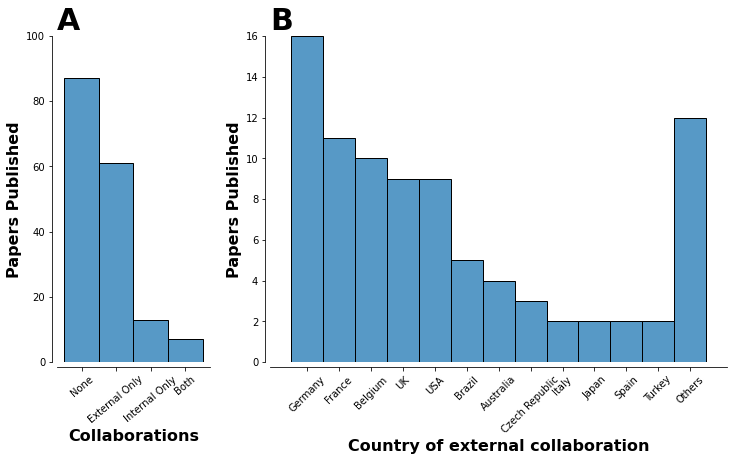

In [112]:
fig, axes = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 3]},  figsize=(12, 6))
sns.despine(offset=5, trim=False)

sns.histplot(ax=axes[1], x="Country of external collaboration",
             data=df6)
sns.histplot(ax=axes[0],x="IEC",
            data=df1)
plt.sca(axes[1])
plt.title('B', loc = 'left', fontsize = 30, weight="bold")
plt.xlabel('Country of external collaboration',weight = "bold", fontsize=16 )
plt.ylabel('Papers Published',weight = "bold", fontsize=16 )
plt.xticks(rotation=45)
plt.ylim((0, 16))
plt.sca(axes[0])
plt.title('A', loc = 'left', fontsize = 30, weight="bold")
plt.ylabel('Papers Published',weight = "bold", fontsize=16 )
plt.xlabel('Collaborations',weight = "bold", fontsize=16 )
plt.xticks(rotation=40)
plt.ylim((0, 100))

plt.savefig('Fig4.png',  bbox_inches = 'tight', dpi=300)

In [113]:
Fig1_2 = Image.open('fig.png')
print(f"Original size : {Fig1_2.size}")

Original size : (1871, 3571)


In [114]:
Fig1_1 = Image.open('fig_.png')

In [115]:
resized = Fig1_1.resize((1547, 3571))
resized.save('Fig_1_1_.png')

In [116]:
img1 = cv2.imread('Fig_1_1_.png')
img2 = cv2.imread('Fig.png')

In [117]:
Fig1 = cv2.hconcat([img1, img2])
  
# show the output image
cv2.imwrite('Figure1.png', Fig1)

True

In [118]:
Fig2_1 = Image.open('fig2.png')
print(f"Original size : {Fig2_1.size}")

Original size : (3349, 1515)


In [119]:
Fig2_2 = Image.open('fig2_.png')

In [120]:
resized = Fig2_2.resize((3088, 1743))
resized.save('Fig_2_2_.png')

In [121]:
img3 = cv2.imread('Fig2.png')
img4 = cv2.imread('Fig2_2.png')

In [122]:
from PIL import Image
images_list = ['Fig2.png', 'Fig2_.png']
imgs = [Image.open(i) for i in images_list]

# If you're using an older version of Pillow, you might have to use .size[0] instead of .width
# and later on, .size[1] instead of .height
min_img_width = min(i.width for i in imgs)

total_height = 0
for i, img in enumerate(imgs):
    # If the image is larger than the minimum width, resize it
    if img.width > min_img_width:
        imgs[i] = img.resize((min_img_width, int(img.height / img.width * min_img_width)), Image.ANTIALIAS)
    total_height += imgs[i].height

# I have picked the mode of the first image to be generic. You may have other ideas
# Now that we know the total height of all of the resized images, we know the height of our final image
img_merge = Image.new(imgs[0].mode, (min_img_width, total_height))
y = 0
for img in imgs:
    img_merge.paste(img, (0, y))

    y += img.height
img_merge.save('Figure2.png')

C:\Users\user\AppData\Local\Temp\ipykernel_16184\717455118.py:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  imgs[i] = img.resize((min_img_width, int(img.height / img.width * min_img_width)), Image.ANTIALIAS)


In [132]:
images_list = ['Fig3.png', 'Fig3_.png']
imgs = [Image.open(i) for i in images_list]

# If you're using an older version of Pillow, you might have to use .size[0] instead of .width
# and later on, .size[1] instead of .height
min_img_width = min(i.width for i in imgs)

total_height = 0
for i, img in enumerate(imgs):
    # If the image is larger than the minimum width, resize it
    if img.width > min_img_width:
        imgs[i] = img.resize((min_img_width, int(img.height / img.width * min_img_width)), Image.ANTIALIAS)
    total_height += imgs[i].height

# I have picked the mode of the first image to be generic. You may have other ideas
# Now that we know the total height of all of the resized images, we know the height of our final image
img_merge = Image.new(imgs[0].mode, (min_img_width, total_height))
y = 0
for img in imgs:
    img_merge.paste(img, (0, y))

    y += img.height
img_merge.save('Figure3.png')

C:\Users\user\AppData\Local\Temp\ipykernel_16184\246021821.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  imgs[i] = img.resize((min_img_width, int(img.height / img.width * min_img_width)), Image.ANTIALIAS)


In [133]:
images_list = ['Figure3.png', 'Fig 3E.png']
imgs = [Image.open(i) for i in images_list]

# If you're using an older version of Pillow, you might have to use .size[0] instead of .width
# and later on, .size[1] instead of .height
min_img_width = min(i.width for i in imgs)

total_height = 0
for i, img in enumerate(imgs):
    # If the image is larger than the minimum width, resize it
    if img.width > min_img_width:
        imgs[i] = img.resize((min_img_width, int(img.height / img.width * min_img_width)), Image.ANTIALIAS)
    total_height += imgs[i].height

# I have picked the mode of the first image to be generic. You may have other ideas
# Now that we know the total height of all of the resized images, we know the height of our final image
img_merge = Image.new(imgs[0].mode, (min_img_width, total_height))
y = 0
for img in imgs:
    img_merge.paste(img, (0, y))

    y += img.height
img_merge.save('Figure3_.png')

C:\Users\user\AppData\Local\Temp\ipykernel_16184\438937606.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  imgs[i] = img.resize((min_img_width, int(img.height / img.width * min_img_width)), Image.ANTIALIAS)


In [125]:
afr = Image.open('fig 4c.png')
print(f"Original size : {afr.size}")

Original size : (1748, 2183)


In [126]:
wld = Image.open('fig 4d.png')
print(f"Original size : {wld.size}")

Original size : (2385, 1222)


In [127]:
resized = afr.resize((1400, 1222))
resized.save('Fig 4c_.png')

In [128]:
img1 = cv2.imread('Fig 4c_.png')
img2 = cv2.imread('fig 4d.png')

In [129]:
Fig4_2 = cv2.hconcat([img1, img2])
  
# show the output image
cv2.imwrite('Figure4_2.png', Fig4_2)

True

In [130]:
images_list = ['Fig4.png', 'Figure4_2.png']
imgs = [Image.open(i) for i in images_list]

# If you're using an older version of Pillow, you might have to use .size[0] instead of .width
# and later on, .size[1] instead of .height
min_img_width = min(i.width for i in imgs)

total_height = 0
for i, img in enumerate(imgs):
    # If the image is larger than the minimum width, resize it
    if img.width > min_img_width:
        imgs[i] = img.resize((min_img_width, int(img.height / img.width * min_img_width)), Image.ANTIALIAS)
    total_height += imgs[i].height

# I have picked the mode of the first image to be generic. You may have other ideas
# Now that we know the total height of all of the resized images, we know the height of our final image
img_merge = Image.new(imgs[0].mode, (min_img_width, total_height))
y = 0
for img in imgs:
    img_merge.paste(img, (0, y))

    y += img.height
img_merge.save('Figure4.png')

C:\Users\user\AppData\Local\Temp\ipykernel_16184\818411476.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  imgs[i] = img.resize((min_img_width, int(img.height / img.width * min_img_width)), Image.ANTIALIAS)
